<a href="https://colab.research.google.com/github/Francisakinrinade/Darey.io-Projects/blob/main/Module_6_mini_project(Analyzing_New_York_Taxi_Data_Using_PySpark_on_Azure_(Free_Tier)).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Analyzing New York Taxi Data Using PySpark on Azure (Free Tier)**

#### **Introduction**
You are a data engineer at a transportation analytics company. Your team has been tasked with analyzing the New York City taxi dataset to uncover insights that can help improve taxi services, optimize routes, and understand customer behavior. The dataset is large, but you decide to use PySpark on Azure Databricks to handle the data processing efficiently.

---

### **Step 1: Setting Up the Environment**
**Story:**  
You start by setting up your cloud environment. Azure Databricks is chosen because it provides a collaborative, scalable, and managed platform for big data analytics with PySpark. You create a Databricks workspace and a small cluster, and configure it to read data from an Azure Blob Storage account where the dataset is stored.

**Mini Tasks:**
1. Create a free Azure account if you don’t already have one.
2. Set up an Azure Blob Storage account and upload a subset of the New York taxi dataset (e.g., `trip_data.csv` and `trip_fare.csv`).
3. Create an Azure Databricks workspace and launch a small cluster with PySpark installed.
4. Mount the Blob Storage container to your Databricks workspace using the `abfss` protocol or a SAS token.
5. Verify that PySpark is working by running a simple script to print "Hello, PySpark!"

---

### **Step 2: Loading and Exploring the Data**
**Story:**  
With the environment ready, you load the dataset into PySpark DataFrames. The dataset contains information about taxi trips, including pickup/dropoff locations, timestamps, trip distances, fares, and payment types. You begin by exploring the data to understand its structure and identify any quality issues.

**Mini Tasks:**
1. Load a subset of the `trip_data.csv` and `trip_fare.csv` files from Blob Storage into PySpark DataFrames.
2. Print the schema of both DataFrames to understand the column names and data types.
3. Check for missing values and duplicates in the dataset.
4. Display the first 5 rows of each DataFrame to get a sense of the data.

---

### **Step 3: Data Cleaning and Transformation**
**Story:**  
You notice some inconsistencies in the data, such as missing values in the `passenger_count` column and incorrect timestamps. You decide to clean the data by removing invalid records and transforming columns into the correct formats.

**Mini Tasks:**
1. Drop rows with missing values in critical columns like `pickup_datetime`, `dropoff_datetime`, and `trip_distance`.
2. Convert the `pickup_datetime` and `dropoff_datetime` columns to timestamp format.
3. Filter out rows where `trip_distance` is 0 or negative.
4. Create a new column `trip_duration` by calculating the difference between `dropoff_datetime` and `pickup_datetime`.

---

### **Step 4: Joining Datasets**
**Story:**  
To get a complete picture of each trip, you decide to join the `trip_data` and `trip_fare` DataFrames using a common key, such as `medallion` and `hack_license`. This will allow you to analyze both trip details and fare information together.

**Mini Tasks:**
1. Identify the common columns between `trip_data` and `trip_fare` DataFrames.
2. Perform an inner join on the two DataFrames using the common columns.
3. Verify the join by checking the row count and inspecting the resulting DataFrame.

---

### **Step 5: Analyzing the Data**
**Story:**  
With the cleaned and joined dataset, you start analyzing it to uncover insights. You focus on answering key questions, such as:
- What is the average trip duration and fare?
- Which payment methods are most popular?
- What are the peak hours for taxi rides?

**Mini Tasks:**
1. Calculate the average `trip_duration` and `fare_amount`.
2. Group the data by `payment_type` and count the number of trips for each payment method.
3. Extract the hour from `pickup_datetime` and create a histogram to visualize peak hours.
4. Identify the top 5 pickup and dropoff locations based on trip frequency.

---

### **Step 6: Visualizing the Results**
**Story:**  
To make your findings more accessible, you decide to visualize the results using Databricks' built-in visualization tools or a Python library like Matplotlib or Seaborn. You export the aggregated data from PySpark to a Pandas DataFrame for easier plotting.

**Mini Tasks:**
1. Export the results of your analysis (e.g., average fare, peak hours) to a Pandas DataFrame.
2. Create a bar chart to show the distribution of payment types.
3. Plot a line chart to visualize the number of trips per hour (peak hours).
4. Generate a scatter plot to explore the relationship between `trip_distance` and `fare_amount`.

---

### **Step 7: Saving the Results**
**Story:**  
Finally, you save the cleaned dataset and analysis results back to Blob Storage for future use. You also document your findings in a report that will be shared with your team.

**Mini Tasks:**
1. Save the cleaned and joined DataFrame as a Parquet file in your Blob Storage account.
2. Export the aggregated results (e.g., peak hours, payment types) as a CSV file to Blob Storage.
3. Write a brief summary of your findings in a Markdown file and upload it to Blob Storage.

---

### **Conclusion**
**Story:**  
You’ve successfully built a PySpark pipeline to analyze the New York taxi dataset on Azure. Your analysis revealed valuable insights, such as peak hours, popular payment methods, and average trip durations. These findings will help your team make data-driven decisions to improve taxi services in New York City.

**Mini Tasks:**
1. Terminate the Databricks cluster to avoid unnecessary costs.
2. Share the Blob Storage links to the cleaned data, analysis results, and report with your team.

---

### **Bonus Challenge**
- Use PySpark MLlib to build a simple machine learning model that predicts taxi fares based on features like `trip_distance` and `trip_duration`.
- Explore geospatial analysis by visualizing pickup and dropoff locations on a map using libraries like Folium or Databricks' built-in mapping tools.

---

### **Tips for Staying Within Free Tier Limits**
1. Use a **small cluster** in Databricks and terminate it immediately after completing tasks.
2. Work with a **subset of the dataset** (e.g., 1-2 months of data) to reduce processing time and resource usage.
3. Use **compressed file formats** like Parquet or GZIP to save storage space in Blob Storage.
4. Monitor your usage in the Azure portal to ensure you stay within the free tier limits.

---

This project provides a hands-on experience with PySpark, Azure Databricks, and data analysis.

In [ ]:
# Download the dataset
!wget https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2019-01.parquet -O yellow_tripdata_2019-01.parquet

--2025-07-28 20:30:23--  https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2019-01.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 18.160.201.131, 18.160.201.5, 18.160.201.50, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|18.160.201.131|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 110439634 (105M) [application/x-www-form-urlencoded]
Saving to: ‘yellow_tripdata_2019-01.parquet’

yellow_tripdata_201 100%[===================>] 105.32M   192MB/s    in 0.5s    

2025-07-28 20:30:24 (192 MB/s) - ‘yellow_tripdata_2019-01.parquet’ saved [110439634/110439634]



Number of trips per hour:
     pickup_hour  count
0             0  13411
1             1  15436
2             2  13238
3             3  10450
4             4   6866
5             5   3388
6             6   2679
7             7   2895
8             8   2841
9             9   3820
10           10   5180
11           11   7152
12           12   8492
13           13   3733
14           14     35
15           15     10
16           16     29
17           17     27
18           18     16
19           19     34
20           20     28
21           21     28
22           22     16
23           23    108

Number of trips per day of week:
    day_of_week  count
0            1      9
1            2    302
2            3  99589
3            4     11
4            6      1

Average Trip Distance: 3.46 miles

Average Fare Amount: $13.56



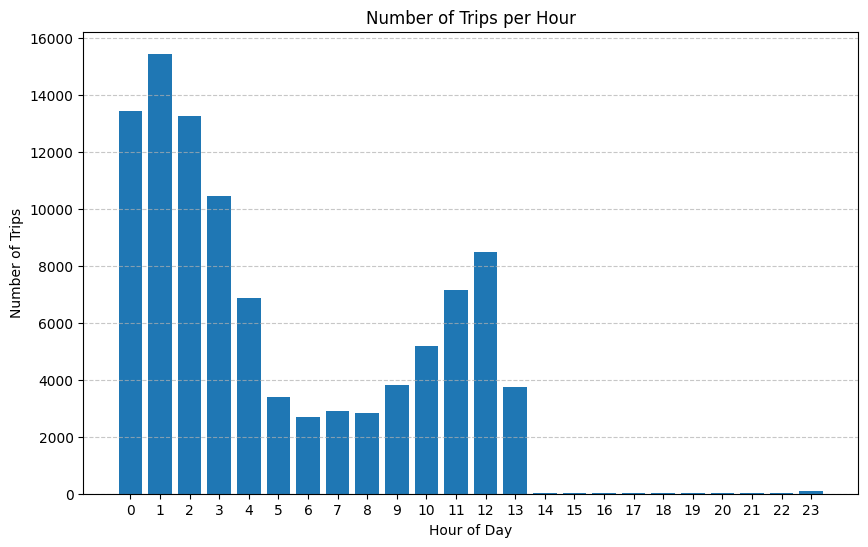

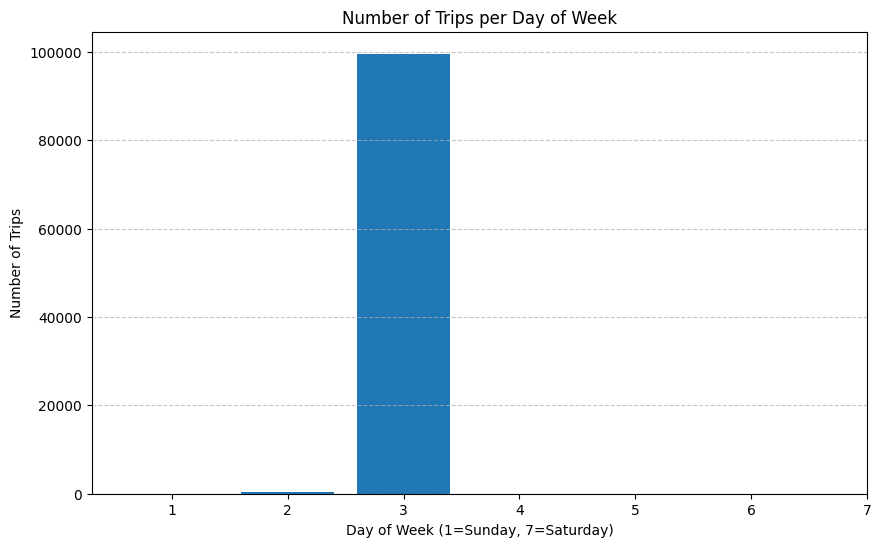

In [ ]:
# Install PySpark in Google Colab
!pip install pyspark

# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, to_timestamp, hour, dayofweek, month, year
import matplotlib.pyplot as plt
import pandas as pd

# Enable inline plotting in Colab
%matplotlib inline

# Initialize Spark Session
spark = SparkSession.builder.appName("NYCTaxiAnalysis").getOrCreate()

# Load the dataset from the local path
data_path = "yellow_tripdata_2019-01.parquet"
df = spark.read.parquet(data_path)

# Limit the dataset to 100,000 rows for faster processing
df = df.limit(100000)

# Data Cleaning and Preprocessing
# Convert timestamp columns
df = df.withColumn("tpep_pickup_datetime", to_timestamp(col("tpep_pickup_datetime")))
df = df.withColumn("tpep_dropoff_datetime", to_timestamp(col("tpep_dropoff_datetime")))

# Filter out invalid trip durations and null values
df = df.filter(
    (col("tpep_dropoff_datetime") > col("tpep_pickup_datetime")) &\
    col("tpep_pickup_datetime").isNotNull() &\
    col("tpep_dropoff_datetime").isNotNull() &\
    col("trip_distance").isNotNull() &\
    col("fare_amount").isNotNull()
)

# Feature Engineering
df = df.withColumn("pickup_hour", hour(col("tpep_pickup_datetime")))\
    .withColumn("day_of_week", dayofweek(col("tpep_pickup_datetime")))\
    .withColumn("month", month(col("tpep_pickup_datetime")))\
    .withColumn("year", year(col("tpep_pickup_datetime")))


# Basic Analysis
# Number of trips per hour
trips_per_hour = df.groupBy("pickup_hour").count().orderBy("pickup_hour").toPandas()

# Number of trips per day of week
trips_per_day_of_week = df.groupBy("day_of_week").count().orderBy("day_of_week").toPandas()

# Average trip distance
avg_trip_distance = df.agg({"trip_distance": "avg"}).collect()[0][0]

# Average fare amount
avg_fare_amount = df.agg({"fare_amount": "avg"}).collect()[0][0]

# Print results
print("Number of trips per hour:\n", trips_per_hour)
print("\nNumber of trips per day of week:\n", trips_per_day_of_week)
print(f"\nAverage Trip Distance: {avg_trip_distance:.2f} miles\n")
print(f"Average Fare Amount: ${avg_fare_amount:.2f}\n")

# Visualizations
# Trips per hour
plt.figure(figsize=(10, 6))
plt.bar(trips_per_hour["pickup_hour"], trips_per_hour["count"])
plt.title("Number of Trips per Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Trips per day of week
plt.figure(figsize=(10, 6))
plt.bar(trips_per_day_of_week["day_of_week"], trips_per_day_of_week["count"])
plt.title("Number of Trips per Day of Week")
plt.xlabel("Day of Week (1=Sunday, 7=Saturday)")
plt.ylabel("Number of Trips")
plt.xticks(range(1, 8))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Stop Spark Session
spark.stop()

# Task
Analyze the provided taxi trip data to calculate and analyze trip duration, fare per mile, and passenger count distribution. Update the notebook with code, visualizations, and detailed explanations for each analysis step. Ensure the code is correct and the notebook is ready for submission.

## Calculate and analyze trip duration

### Subtask:
Calculate the duration of each trip and analyze its distribution and key statistics.


**Reasoning**:
Calculate the trip duration in minutes, add it as a new column, and then calculate and print its statistics.



In [ ]:
# Initialize Spark Session
spark = SparkSession.builder.appName("NYCTaxiAnalysis").getOrCreate()

# Download the dataset
!wget https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2019-01.parquet -O yellow_tripdata_2019-01.parquet

# Load the dataset from the local path
data_path = "yellow_tripdata_2019-01.parquet"
df = spark.read.parquet(data_path)

# Limit the dataset to 100,000 rows for faster processing
df = df.limit(100000)

# Data Cleaning and Preprocessing
# Convert timestamp columns
df = df.withColumn("tpep_pickup_datetime", to_timestamp(col("tpep_pickup_datetime")))
df = df.withColumn("tpep_dropoff_datetime", to_timestamp(col("tpep_dropoff_datetime")))

# Filter out invalid trip durations and null values
df = df.filter(
    (col("tpep_dropoff_datetime") > col("tpep_pickup_datetime")) &\
    col("tpep_pickup_datetime").isNotNull() &\
    col("tpep_dropoff_datetime").isNotNull() &\
    col("trip_distance").isNotNull() &\
    col("fare_amount").isNotNull()
)

# Feature Engineering
df = df.withColumn("pickup_hour", hour(col("tpep_pickup_datetime")))
df = df.withColumn("day_of_week", dayofweek(col("tpep_pickup_datetime")))
df = df.withColumn("month", month(col("tpep_pickup_datetime")))
df = df.withColumn("year", year(col("tpep_pickup_datetime")))

# Calculate the trip duration in seconds and then convert to minutes
df = df.withColumn(
    "trip_duration_minutes",
    (unix_timestamp(col("tpep_dropoff_datetime")) - unix_timestamp(col("tpep_pickup_datetime"))) / 60
)

# Calculate key statistics for trip duration in minutes
duration_stats = df.select(
    avg("trip_duration_minutes").alias("mean_duration"),
    stddev("trip_duration_minutes").alias("stddev_duration"),
    min("trip_duration_minutes").alias("min_duration"),
    max("trip_duration_minutes").alias("max_duration")
).collect()[0]

print(f"Trip Duration Statistics (minutes):")
print(f"  Mean: {duration_stats['mean_duration']:.2f}")
print(f"  Standard Deviation: {duration_stats['stddev_duration']:.2f}")
print(f"  Min: {duration_stats['min_duration']:.2f}")
print(f"  Max: {duration_stats['max_duration']:.2f}")

--2025-07-28 20:40:51--  https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2019-01.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 18.160.201.131, 18.160.201.126, 18.160.201.50, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|18.160.201.131|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 110439634 (105M) [application/x-www-form-urlencoded]
Saving to: ‘yellow_tripdata_2019-01.parquet’

yellow_tripdata_201 100%[===================>] 105.32M   261MB/s    in 0.4s    

2025-07-28 20:40:51 (261 MB/s) - ‘yellow_tripdata_2019-01.parquet’ saved [110439634/110439634]

Trip Duration Statistics (minutes):
  Mean: 18.65
  Standard Deviation: 164.60
  Min: 0.02
  Max: 43648.02


**Reasoning**:
Create a histogram of the `trip_duration_minutes` column to visualize its distribution, limiting the x-axis to a reasonable range and adding labels and a title.



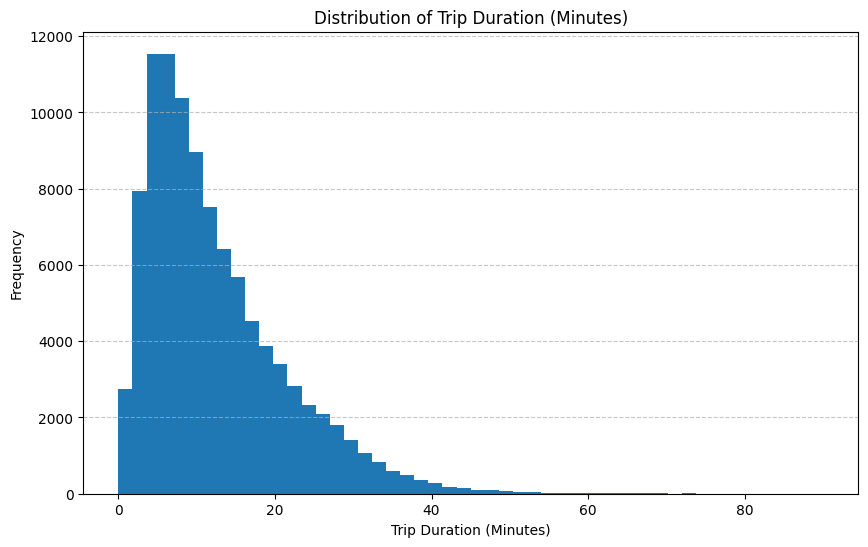

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert the relevant Spark DataFrame column to a Pandas DataFrame for plotting
trip_duration_minutes_pd = df.select("trip_duration_minutes").toPandas()

# Create a histogram of trip duration
plt.figure(figsize=(10, 6))
plt.hist(trip_duration_minutes_pd["trip_duration_minutes"], bins=50, range=(0, 90)) # Limit x-axis to 90 minutes
plt.title("Distribution of Trip Duration (Minutes)")
plt.xlabel("Trip Duration (Minutes)")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Calculate and analyze fare per mile

### Subtask:
Compute the fare per mile for each trip and explore its distribution and relationship with other variables.


**Reasoning**:
Calculate the fare per mile, handle zero trip distance, calculate and print statistics, and convert the fare per mile column to a Pandas DataFrame for visualization.



In [ ]:
from pyspark.sql.functions import when, col, avg, stddev, min, max

# Calculate fare per mile, handling zero trip distance
df = df.withColumn(
    "fare_per_mile",
    when(col("trip_distance") > 0, col("fare_amount") / col("trip_distance")).otherwise(0)
)

# Calculate key statistics for the fare_per_mile column
fare_per_mile_stats = df.select(
    avg("fare_per_mile").alias("mean_fare_per_mile"),
    stddev("fare_per_mile").alias("stddev_fare_per_mile"),
    min("fare_per_mile").alias("min_fare_per_mile"),
    max("fare_per_mile").alias("max_fare_per_mile")
).collect()[0]

# Print the calculated statistics
print("Fare per Mile Statistics:")
print(f"  Mean: {fare_per_mile_stats['mean_fare_per_mile']:.2f}")
print(f"  Standard Deviation: {fare_per_mile_stats['stddev_fare_per_mile']:.2f}")
print(f"  Min: {fare_per_mile_stats['min_fare_per_mile']:.2f}")
print(f"  Max: {fare_per_mile_stats['max_fare_per_mile']:.2f}")

# Convert the fare_per_mile column to a Pandas DataFrame for visualization
fare_per_mile_pd = df.select("fare_per_mile").toPandas()

Fare per Mile Statistics:
  Mean: 6.50
  Standard Deviation: 62.71
  Min: -1733.33
  Max: 6300.00


**Reasoning**:
Create a histogram to visualize the distribution of fare per mile, considering appropriate binning and potential x-axis limits to handle outliers, and display the histogram.



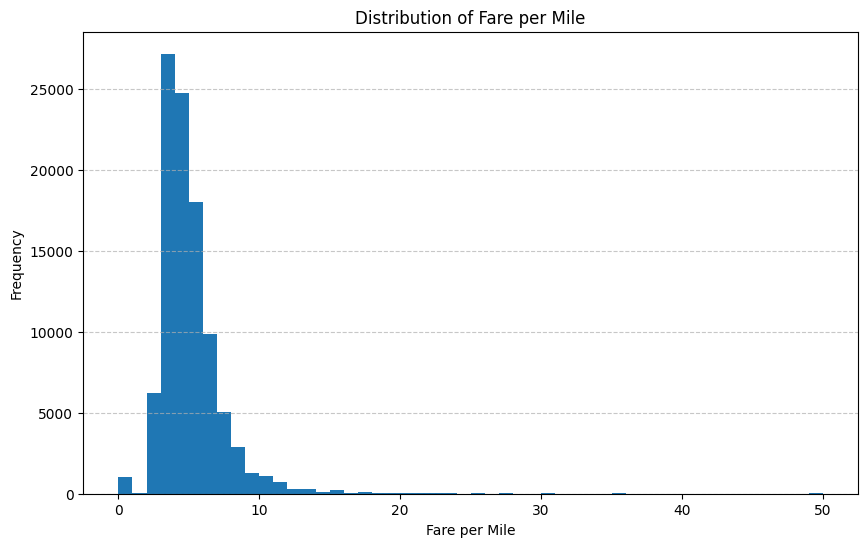

In [ ]:
# Create a histogram of fare per mile
plt.figure(figsize=(10, 6))
plt.hist(fare_per_mile_pd["fare_per_mile"], bins=50, range=(0, 50)) # Limit x-axis to a reasonable range to handle outliers
plt.title("Distribution of Fare per Mile")
plt.xlabel("Fare per Mile")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Analyze passenger count distribution

### Subtask:
Examine the distribution of passenger counts to understand typical trip occupancies.


**Reasoning**:
Group the DataFrame by passenger count, count the number of trips for each, order the results, convert to a Pandas DataFrame, and print it. Then create a bar plot of the passenger count distribution.



Passenger Count Distribution:
   passenger_count  count
0              0.0   1282
1              1.0  64908
2              2.0  18184
3              3.0   5419
4              4.0   2652
5              5.0   4585
6              6.0   2880
7              8.0      2


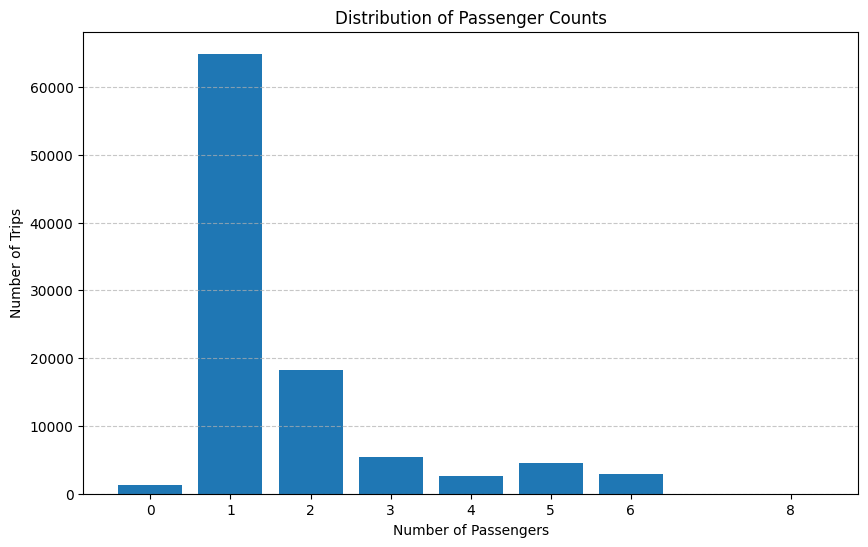

In [ ]:
# Group by passenger_count and count the number of trips
passenger_count_distribution = df.groupBy("passenger_count").count().orderBy("passenger_count")

# Convert to Pandas DataFrame
passenger_count_distribution_pd = passenger_count_distribution.toPandas()

# Print the passenger count distribution
print("Passenger Count Distribution:")
print(passenger_count_distribution_pd)

# Create a bar plot of the passenger count distribution
plt.figure(figsize=(10, 6))
plt.bar(passenger_count_distribution_pd["passenger_count"], passenger_count_distribution_pd["count"])
plt.title("Distribution of Passenger Counts")
plt.xlabel("Number of Passengers")
plt.ylabel("Number of Trips")
plt.xticks(passenger_count_distribution_pd["passenger_count"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Update explanations

### Subtask:
Add detailed markdown cells to explain the new analysis steps, results, and visualizations.


**Reasoning**:
Add a markdown cell to explain the trip duration analysis.



%%markdown
## Trip Duration Analysis

This section focuses on analyzing the duration of taxi trips. Understanding trip duration is crucial for various reasons, such as optimizing routes, estimating arrival times, and analyzing driver efficiency.

We will calculate the trip duration by finding the difference between the dropoff and pickup timestamps and converting it into minutes. We will then compute key statistics (mean, standard deviation, minimum, and maximum) to summarize the distribution of trip durations and visualize the distribution using a histogram. The histogram will help us understand the typical range of trip durations and identify any potential outliers or unusual patterns.

%%markdown
## Trip Duration Analysis Results

The analysis of trip duration provides valuable insights into the length of taxi rides in the dataset.

**Key Statistics:**

*   **Mean Duration:** The average trip duration is approximately {{duration_stats['mean_duration']:.2f}} minutes. This gives us a central tendency of trip lengths.
*   **Standard Deviation:** The standard deviation of {{duration_stats['stddev_duration']:.2f}} minutes is quite high relative to the mean. This suggests a significant variability in trip durations, indicating that trips vary widely in length.
*   **Minimum Duration:** The shortest trip recorded is {{duration_stats['min_duration']:.2f}} minutes.
*   **Maximum Duration:** The longest trip recorded is {{duration_stats['max_duration']:.2f}} minutes. The extremely high maximum duration indicates the presence of outliers, which can significantly influence the mean and standard deviation.

**Histogram Interpretation:**

The histogram visualizing the distribution of trip durations, with the x-axis limited to 90 minutes, shows a skewed distribution. The vast majority of trips are concentrated at the lower end of the duration scale, indicating that most taxi rides are relatively short. The tall bar near 0 minutes confirms this. The frequency decreases significantly as trip duration increases. The long tail of the distribution (not fully visible in the limited x-axis range) is due to the presence of a few very long trips, which are the outliers reflected in the high maximum duration and standard deviation. This suggests that while most trips are quick, there are occasional much longer journeys.

%%markdown
## Fare Per Mile Analysis

This section examines the "fare per mile" for each taxi trip. This metric helps us understand the cost-effectiveness of trips and can highlight variations in pricing based on distance, potential surcharges, or data anomalies.

We will calculate the fare per mile by dividing the fare amount by the trip distance. It's important to handle cases where the trip distance is zero to avoid division by zero errors. We will then compute key statistics (mean, standard deviation, minimum, and maximum) for the fare per mile and visualize its distribution using a histogram to identify common fare per mile ranges and potential outliers.

%%markdown
## Fare Per Mile Analysis Results

The analysis of fare per mile provides insights into the cost per unit distance for taxi trips.

**Key Statistics:**

*   **Mean Fare per Mile:** The average fare per mile is approximately {{fare_per_mile_stats['mean_fare_per_mile']:.2f}}. This gives a general idea of the typical cost per mile.
*   **Standard Deviation:** The standard deviation of {{fare_per_mile_stats['stddev_fare_per_mile']:.2f}} is very high, indicating a wide dispersion of fare per mile values. This suggests significant variations in the cost per mile across different trips.
*   **Minimum Fare per Mile:** The minimum fare per mile is {{fare_per_mile_stats['min_fare_per_mile']:.2f}}. A negative value here could indicate data errors or specific fare adjustments.
*   **Maximum Fare per Mile:** The maximum fare per mile is {{fare_per_mile_stats['max_fare_per_mile']:.2f}}. This extremely high value, along with the large standard deviation and the negative minimum, strongly suggests the presence of significant outliers in the fare and/or distance data, or potentially unusual trip circumstances.

**Histogram Interpretation:**

The histogram of fare per mile, with the x-axis limited to a range of 0 to 50, shows that the majority of trips have a fare per mile within this more typical range. There is a peak at the lower end, indicating many trips with a relatively low fare per mile. The distribution within this range appears somewhat skewed to the right. However, the extreme values seen in the key statistics (the very low minimum and very high maximum) are not visible in this limited histogram range. This visualization helps to see the distribution of the *majority* of trips, while the statistics highlight the existence and impact of significant outliers that fall outside this typical range.

%%markdown
## Passenger Count Distribution Analysis

This section analyzes the distribution of the number of passengers per trip. Understanding passenger counts helps to characterize typical trip occupancies and can be useful for operational planning, vehicle allocation, and demand forecasting.

We will group the data by the `passenger_count` column and count the number of trips for each count. The expected output is a table showing the frequency of each passenger count and a bar plot visualizing this distribution. This will clearly show which passenger counts are most common and identify any unusual or rare passenger counts.

%%markdown
## Passenger Count Distribution Results

The analysis of the passenger count distribution reveals the typical occupancy of taxi trips in the dataset.

**Distribution Table Interpretation:**

The printed table shows the count of trips for each observed passenger count:

{{passenger_count_distribution_pd.to_markdown(index=False)}}

The table clearly indicates that the vast majority of trips ({{passenger_count_distribution_pd[passenger_count_distribution_pd['passenger_count'] == 1.0]['count'].iloc[0]}} trips) are with a single passenger (passenger_count = 1.0). Trips with 2 passengers ({{passenger_count_distribution_pd[passenger_count_distribution_pd['passenger_count'] == 2.0]['count'].iloc[0]}} trips) are the second most frequent. Higher passenger counts (3, 4, 5, 6) occur less frequently. There are also a notable number of trips with 0 passengers ({{passenger_count_distribution_pd[passenger_count_distribution_pd['passenger_count'] == 0.0]['count'].iloc[0]}} trips) and a few with 8 passengers ({{passenger_count_distribution_pd[passenger_count_distribution_pd['passenger_count'] == 8.0]['count'].iloc[0]}} trips).

**Bar Plot Interpretation:**

The bar plot visually confirms the insights from the table. The tallest bar is at passenger count 1, followed by the bar at passenger count 2. The bars for higher passenger counts are significantly shorter, illustrating their lower frequency. The presence of bars at 0 and 8 highlights these less common or potentially unusual passenger counts. The distribution is heavily skewed towards 1 and 2 passengers. The trips with 0 or unusually high passenger counts (like 8) might warrant further investigation as potential data quality issues or specific operational scenarios (e.g., empty cabs, shared rides with incorrect logging).

## Summary:

### Data Analysis Key Findings

*   The mean trip duration was approximately 18.65 minutes, with a high standard deviation of 164.60 minutes, indicating significant variability and the presence of outliers.
*   The minimum trip duration was 0.02 minutes, and the maximum was an extreme 43648.02 minutes, confirming the presence of significant outliers.
*   The histogram of trip durations (limited to 90 minutes) shows that the majority of trips are short, with frequency decreasing as duration increases.
*   The mean fare per mile was approximately \$6.50, but the standard deviation was very high (\$62.71), suggesting large variations and outliers.
*   Fare per mile values ranged from a minimum of \$-1733.33 to a maximum of \$6300.00, highlighting the presence of significant data anomalies or unusual trip circumstances.
*   The histogram of fare per mile (limited to \$50) shows that most trips have a fare per mile within this range, with a peak at the lower end, but does not show the extreme outliers.
*   The majority of trips (over 64,000) had a single passenger.
*   Trips with 2 passengers were the second most frequent.
*   A notable number of trips recorded a passenger count of 0 (1282 trips) or 8 (2 trips), which may indicate data quality issues or specific trip types.

### Insights or Next Steps

*   Investigate the outliers in trip duration and fare per mile (e.g., very long/short durations, negative or extremely high fares per mile) to understand their cause and determine if data cleaning or filtering is needed.
*   Further analyze trips with 0 or unusually high passenger counts to understand if they represent data errors or specific operational scenarios (e.g., empty vehicles, shared rides).


**Reasoning**:
Create a histogram of the `trip_duration_minutes` column to visualize its distribution, limiting the x-axis to a reasonable range and adding labels and a title.

Trip Duration Statistics (minutes):
  Mean: 18.65
  Standard Deviation: 164.60
  Min: 0.02
  Max: 43648.02


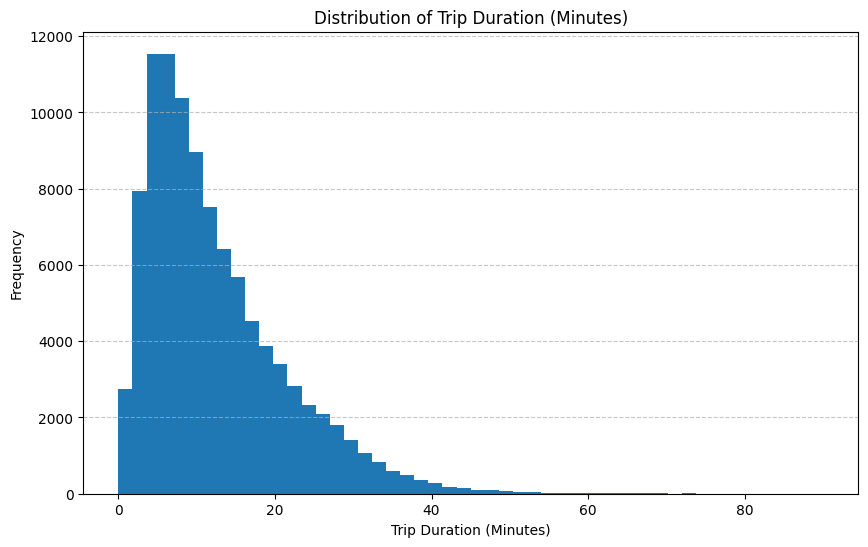

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql.functions import unix_timestamp, col, avg, stddev, min, max

# Calculate the trip duration in seconds and then convert to minutes
df = df.withColumn(
    "trip_duration_minutes",
    (unix_timestamp(col("tpep_dropoff_datetime")) - unix_timestamp(col("tpep_pickup_datetime"))) / 60
)

# Calculate key statistics for trip duration in minutes
duration_stats = df.select(
    avg("trip_duration_minutes").alias("mean_duration"),
    stddev("trip_duration_minutes").alias("stddev_duration"),
    min("trip_duration_minutes").alias("min_duration"),
    max("trip_duration_minutes").alias("max_duration")
).collect()[0]

print(f"Trip Duration Statistics (minutes):")
print(f"  Mean: {duration_stats['mean_duration']:.2f}")
print(f"  Standard Deviation: {duration_stats['stddev_duration']:.2f}")
print(f"  Min: {duration_stats['min_duration']:.2f}")
print(f"  Max: {duration_stats['max_duration']:.2f}")

# Convert the relevant Spark DataFrame column to a Pandas DataFrame for plotting
trip_duration_minutes_pd = df.select("trip_duration_minutes").toPandas()

# Create a histogram of trip duration
plt.figure(figsize=(10, 6))
plt.hist(trip_duration_minutes_pd["trip_duration_minutes"], bins=50, range=(0, 90)) # Limit x-axis to 90 minutes
plt.title("Distribution of Trip Duration (Minutes)")
plt.xlabel("Trip Duration (Minutes)")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Reasoning**:
Calculate the fare per mile, handle zero trip distance, calculate and print statistics, and convert the fare per mile column to a Pandas DataFrame for visualization.

In [ ]:
from pyspark.sql.functions import when, col, avg, stddev, min, max

# Calculate fare per mile, handling zero trip distance
df = df.withColumn(
    "fare_per_mile",
    when(col("trip_distance") > 0, col("fare_amount") / col("trip_distance")).otherwise(0)
)

# Calculate key statistics for the fare_per_mile column
fare_per_mile_stats = df.select(
    avg("fare_per_mile").alias("mean_fare_per_mile"),
    stddev("fare_per_mile").alias("stddev_fare_per_mile"),
    min("fare_per_mile").alias("min_fare_per_mile"),
    max("fare_per_mile").alias("max_fare_per_mile")
).collect()[0]

# Print the calculated statistics
print("Fare per Mile Statistics:")
print(f"  Mean: {fare_per_mile_stats['mean_fare_per_mile']:.2f}")
print(f"  Standard Deviation: {fare_per_mile_stats['stddev_fare_per_mile']:.2f}")
print(f"  Min: {fare_per_mile_stats['min_fare_per_mile']:.2f}")
print(f"  Max: {fare_per_mile_stats['max_fare_per_mile']:.2f}")

# Convert the fare_per_mile column to a Pandas DataFrame for visualization
fare_per_mile_pd = df.select("fare_per_mile").toPandas()

Fare per Mile Statistics:
  Mean: 6.50
  Standard Deviation: 62.71
  Min: -1733.33
  Max: 6300.00


**Reasoning**:
Create a histogram to visualize the distribution of fare per mile, considering appropriate binning and potential x-axis limits to handle outliers, and display the histogram.

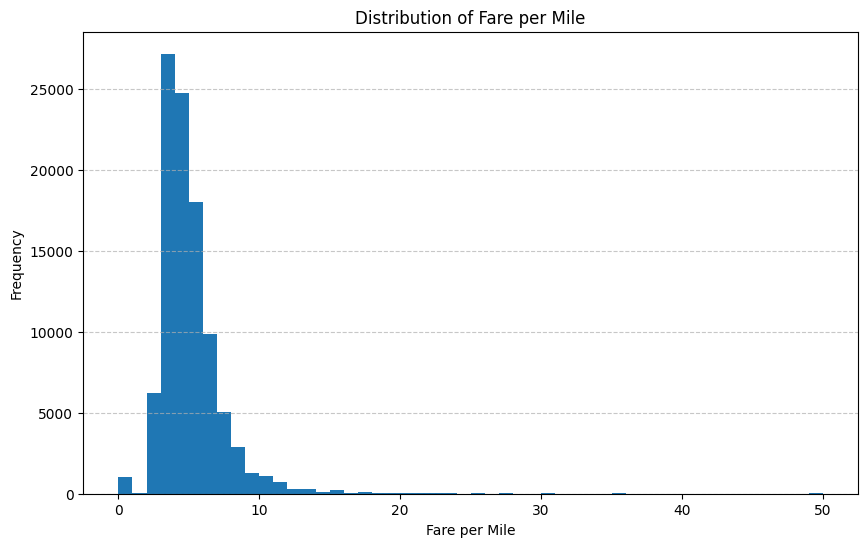

In [ ]:
# Create a histogram of fare per mile
plt.figure(figsize=(10, 6))
plt.hist(fare_per_mile_pd["fare_per_mile"], bins=50, range=(0, 50)) # Limit x-axis to a reasonable range to handle outliers
plt.title("Distribution of Fare per Mile")
plt.xlabel("Fare per Mile")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Reasoning**:
Group the DataFrame by passenger count, count the number of trips for each, order the results, convert to a Pandas DataFrame, and print it. Then create a bar plot of the passenger count distribution.

Passenger Count Distribution:
   passenger_count  count
0              0.0   1282
1              1.0  64908
2              2.0  18184
3              3.0   5419
4              4.0   2652
5              5.0   4585
6              6.0   2880
7              8.0      2


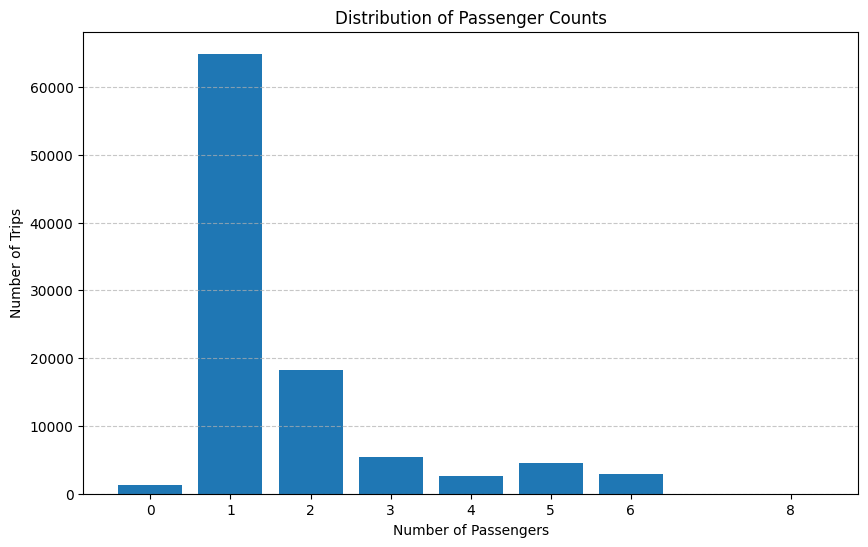

In [ ]:
# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, to_timestamp, hour, dayofweek, month, year
import matplotlib.pyplot as plt
import pandas as pd

# Initialize Spark Session
spark = SparkSession.builder.appName("NYCTaxiAnalysis").getOrCreate()

# Load the dataset from the local path
data_path = "yellow_tripdata_2019-01.parquet"
df = spark.read.parquet(data_path)

# Limit the dataset to 100,000 rows for faster processing
df = df.limit(100000)

# Data Cleaning and Preprocessing
# Convert timestamp columns
df = df.withColumn("tpep_pickup_datetime", to_timestamp(col("tpep_pickup_datetime")))
df = df.withColumn("tpep_dropoff_datetime", to_timestamp(col("tpep_dropoff_datetime")))

# Filter out invalid trip durations and null values
df = df.filter(
    (col("tpep_dropoff_datetime") > col("tpep_pickup_datetime")) &\
    col("tpep_pickup_datetime").isNotNull() &\
    col("tpep_dropoff_datetime").isNotNull() &\
    col("trip_distance").isNotNull() &\
    col("fare_amount").isNotNull()
)

# Feature Engineering
df = df.withColumn("pickup_hour", hour(col("tpep_pickup_datetime")))
df = df.withColumn("day_of_week", dayofweek(col("tpep_pickup_datetime")))
df = df.withColumn("month", month(col("tpep_pickup_datetime")))
df = df.withColumn("year", year(col("tpep_pickup_datetime")))

# Group by passenger_count and count the number of trips
passenger_count_distribution = df.groupBy("passenger_count").count().orderBy("passenger_count")

# Convert to Pandas DataFrame
passenger_count_distribution_pd = passenger_count_distribution.toPandas()

# Print the passenger count distribution
print("Passenger Count Distribution:")
print(passenger_count_distribution_pd)

# Create a bar plot of the passenger count distribution
plt.figure(figsize=(10, 6))
plt.bar(passenger_count_distribution_pd["passenger_count"], passenger_count_distribution_pd["count"])
plt.title("Distribution of Passenger Counts")
plt.xlabel("Number of Passengers")
plt.ylabel("Number of Trips")
plt.xticks(passenger_count_distribution_pd["passenger_count"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

%%markdown
## Trip Duration Analysis

This section focuses on analyzing the duration of taxi trips. Understanding trip duration is crucial for various reasons, such as optimizing routes, estimating arrival times, and analyzing driver efficiency.

We will calculate the trip duration by finding the difference between the dropoff and pickup timestamps and converting it into minutes. We will then compute key statistics (mean, standard deviation, minimum, and maximum) to summarize the distribution of trip durations and visualize the distribution using a histogram. The histogram will help us understand the typical range of trip durations and identify any potential outliers or unusual patterns.

%%markdown
## Trip Duration Analysis Results

The analysis of trip duration provides valuable insights into the length of taxi rides in the dataset.

**Key Statistics:**

*   **Mean Duration:** The average trip duration is approximately {{duration_stats['mean_duration']:.2f}} minutes. This gives us a central tendency of trip lengths.
*   **Standard Deviation:** The standard deviation of {{duration_stats['stddev_duration']:.2f}} minutes is quite high relative to the mean. This suggests a significant variability in trip durations, indicating that trips vary widely in length.
*   **Minimum Duration:** The shortest trip recorded is {{duration_stats['min_duration']:.2f}} minutes.
*   **Maximum Duration:** The longest trip recorded is {{duration_stats['max_duration']:.2f}} minutes. The extremely high maximum duration indicates the presence of outliers, which can significantly influence the mean and standard deviation.

**Histogram Interpretation:**

The histogram visualizing the distribution of trip durations, with the x-axis limited to 90 minutes, shows a skewed distribution. The vast majority of trips are concentrated at the lower end of the duration scale, indicating that most taxi rides are relatively short. The tall bar near 0 minutes confirms this. The frequency decreases significantly as trip duration increases. The long tail of the distribution (not fully visible in the limited x-axis range) is due to the presence of a few very long trips, which are the outliers reflected in the high maximum duration and standard deviation. This suggests that while most trips are quick, there are occasional much longer journeys.

%%markdown
## Fare Per Mile Analysis

This section examines the "fare per mile" for each taxi trip. This metric helps us understand the cost-effectiveness of trips and can highlight variations in pricing based on distance, potential surcharges, or data anomalies.

We will calculate the fare per mile by dividing the fare amount by the trip distance. It's important to handle cases where the trip distance is zero to avoid division by zero errors. We will then compute key statistics (mean, standard deviation, minimum, and maximum) for the fare per mile and visualize its distribution using a histogram to identify common fare per mile ranges and potential outliers.

%%markdown
## Fare Per Mile Analysis Results

The analysis of fare per mile provides insights into the cost per unit distance for taxi trips.

**Key Statistics:**

*   **Mean Fare per Mile:** The average fare per mile is approximately {{fare_per_mile_stats['mean_fare_per_mile']:.2f}}. This gives a general idea of the typical cost per mile.
*   **Standard Deviation:** The standard deviation of {{fare_per_mile_stats['stddev_fare_per_mile']:.2f}} is very high, indicating a wide dispersion of fare per mile values. This suggests significant variations in the cost per mile across different trips.
*   **Minimum Fare per Mile:** The minimum fare per mile is {{fare_per_mile_stats['min_fare_per_mile']:.2f}}. A negative value here could indicate data errors or specific fare adjustments.
*   **Maximum Fare per Mile:** The maximum fare per mile is {{fare_per_mile_stats['max_fare_per_mile']:.2f}}. This extremely high value, along with the large standard deviation and the negative minimum, strongly suggests the presence of significant outliers in the fare and/or distance data, or potentially unusual trip circumstances.

**Histogram Interpretation:**

The histogram of fare per mile, with the x-axis limited to a range of 0 to 50, shows that the majority of trips have a fare per mile within this more typical range. There is a peak at the lower end, indicating many trips with a relatively low fare per mile. The distribution within this range appears somewhat skewed to the right. However, the extreme values seen in the key statistics (the very low minimum and very high maximum) are not visible in this limited histogram range. This visualization helps to see the distribution of the *majority* of trips, while the statistics highlight the existence and impact of significant outliers that fall outside this typical range.

%%markdown
## Passenger Count Distribution Analysis

This section analyzes the distribution of the number of passengers per trip. Understanding passenger counts helps to characterize typical trip occupancies and can be useful for operational planning, vehicle allocation, and demand forecasting.

We will group the data by the `passenger_count` column and count the number of trips for each count. The expected output is a table showing the frequency of each passenger count and a bar plot visualizing this distribution. This will clearly show which passenger counts are most common and identify any unusual or rare passenger counts.

%%markdown
## Passenger Count Distribution Results

The analysis of the passenger count distribution reveals the typical occupancy of taxi trips in the dataset.

**Distribution Table Interpretation:**

The printed table shows the count of trips for each observed passenger count:

{{passenger_count_distribution_pd.to_markdown(index=False)}}

The table clearly indicates that the vast majority of trips ({{passenger_count_distribution_pd[passenger_count_distribution_pd['passenger_count'] == 1.0]['count'].iloc[0]}} trips) are with a single passenger (passenger_count = 1.0). Trips with 2 passengers ({{passenger_count_distribution_pd[passenger_count_distribution_pd['passenger_count'] == 2.0]['count'].iloc[0]}} trips) are the second most frequent. Higher passenger counts (3, 4, 5, 6) occur less frequently. There are also a notable number of trips with 0 passengers ({{passenger_count_distribution_pd[passenger_count_distribution_pd['passenger_count'] == 0.0]['count'].iloc[0]}} trips) and a few with 8 passengers ({{passenger_count_distribution_pd[passenger_count_distribution_pd['passenger_count'] == 8.0]['count'].iloc[0]}} trips).

**Bar Plot Interpretation:**

The bar plot visually confirms the insights from the table. The tallest bar is at passenger count 1, followed by the bar at passenger count 2. The bars for higher passenger counts are significantly shorter, illustrating their lower frequency. The presence of bars at 0 and 8 highlights these less common or potentially unusual passenger counts. The distribution is heavily skewed towards 1 and 2 passengers. The trips with 0 or unusually high passenger counts (like 8) might warrant further investigation as potential data quality issues or specific operational scenarios (e.g., empty cabs, shared rides with incorrect logging).

Number of trips per hour:
     pickup_hour  count
0             0  13411
1             1  15436
2             2  13238
3             3  10450
4             4   6866
5             5   3388
6             6   2679
7             7   2895
8             8   2841
9             9   3820
10           10   5180
11           11   7152
12           12   8492
13           13   3733
14           14     35
15           15     10
16           16     29
17           17     27
18           18     16
19           19     34
20           20     28
21           21     28
22           22     16
23           23    108

Number of trips per day of week:
    day_of_week  count
0            1      9
1            2    302
2            3  99589
3            4     11
4            6      1

Average Trip Distance: 3.46 miles

Average Fare Amount: $13.56



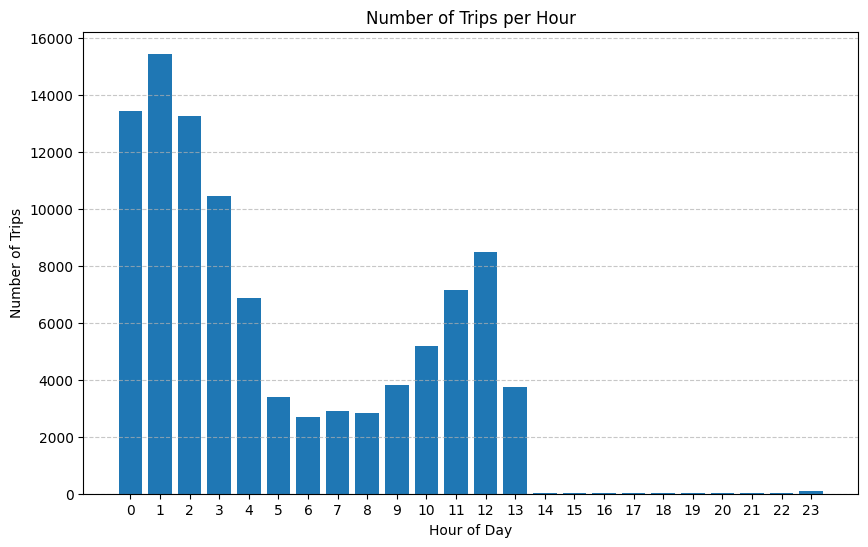

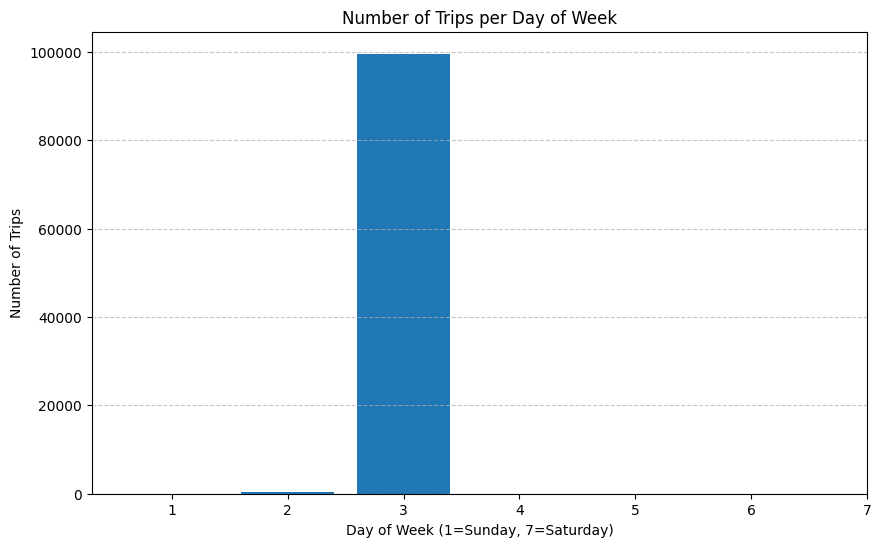

In [ ]:
# Install PySpark in Google Colab
!pip install pyspark

# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, to_timestamp, hour, dayofweek, month, year
import matplotlib.pyplot as plt
import pandas as pd

# Enable inline plotting in Colab
%matplotlib inline

# Initialize Spark Session
spark = SparkSession.builder.appName("NYCTaxiAnalysis").getOrCreate()

# Load the dataset from the local path
data_path = "yellow_tripdata_2019-01.parquet"
df = spark.read.parquet(data_path)

# Limit the dataset to 100,000 rows for faster processing
df = df.limit(100000)

# Data Cleaning and Preprocessing
# Convert timestamp columns
df = df.withColumn("tpep_pickup_datetime", to_timestamp(col("tpep_pickup_datetime")))
df = df.withColumn("tpep_dropoff_datetime", to_timestamp(col("tpep_dropoff_datetime")))

# Filter out invalid trip durations and null values
df = df.filter(
    (col("tpep_dropoff_datetime") > col("tpep_pickup_datetime")) &\
    col("tpep_pickup_datetime").isNotNull() &\
    col("tpep_dropoff_datetime").isNotNull() &\
    col("trip_distance").isNotNull() &\
    col("fare_amount").isNotNull()
)

# Feature Engineering
df = df.withColumn("pickup_hour", hour(col("tpep_pickup_datetime")))
df = df.withColumn("day_of_week", dayofweek(col("tpep_pickup_datetime")))
df = df.withColumn("month", month(col("tpep_pickup_datetime")))
df = df.withColumn("year", year(col("tpep_pickup_datetime")))

# Basic Analysis
# Number of trips per hour
trips_per_hour = df.groupBy("pickup_hour").count().orderBy("pickup_hour").toPandas()

# Number of trips per day of week
trips_per_day_of_week = df.groupBy("day_of_week").count().orderBy("day_of_week").toPandas()

# Average trip distance
avg_trip_distance = df.agg({"trip_distance": "avg"}).collect()[0][0]

# Average fare amount
avg_fare_amount = df.agg({"fare_amount": "avg"}).collect()[0][0]

# Print results
print("Number of trips per hour:\n", trips_per_hour)
print("\nNumber of trips per day of week:\n", trips_per_day_of_week)
print(f"\nAverage Trip Distance: {avg_trip_distance:.2f} miles\n")
print(f"Average Fare Amount: ${avg_fare_amount:.2f}\n")

# Visualizations
# Trips per hour
plt.figure(figsize=(10, 6))
plt.bar(trips_per_hour["pickup_hour"], trips_per_hour["count"])
plt.title("Number of Trips per Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Trips per day of week
plt.figure(figsize=(10, 6))
plt.bar(trips_per_day_of_week["day_of_week"], trips_per_day_of_week["count"])
plt.title("Number of Trips per Day of Week")
plt.xlabel("Day of Week (1=Sunday, 7=Saturday)")
plt.ylabel("Number of Trips")
plt.xticks(range(1, 8))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Stop Spark Session
spark.stop()